# Naive Bayes

1. Questions
2. 
3. 

In [1]:
import requests
import json
import re
#import pycountry
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

appledf = pd.read_csv("../websitedata/apple_py.csv")

newAppledf = pd.read_csv("../websitedata/newApple_py.csv")

In [2]:
y = appledf["Peak"]
y=np.array(y)

In [3]:
#training, validation, and testing sets
import random

x = newAppledf.to_numpy()
N = x.shape[0]
l = [*range(N)]     # indices
cut = int(0.8 * N) #80% of the list
random.shuffle(l)   # randomize
train_index = l[:cut] # first 80% of shuffled list
test_index = l[cut:] # last 20% of shuffled list

#little validation set from training set
#valid = int(0.1 * len(train_index))  # 10% of training set will be used as a validation set
#random.shuffle(train_index)
#val_index = train_index[:valid]
#train_index = train_index[valid:]

#x_valid = x[val_index]
#y_valid = y[val_index]

print(train_index[0:10])
print(test_index[0:10])

set_train = set(train_index)
set_test = set(test_index)

[451, 829, 385, 15, 632, 341, 690, 321, 350, 491]
[610, 232, 659, 389, 388, 496, 416, 334, 404, 484]


### Feature Selection- Record Data

In [ ]:
# COMPUTE UPPER AND LOWER LIMIT FOR VARIANCE ACCROSS SAMPLES
x_var=np.var(x,axis=0)
print(np.min(x_var))
print(np.max(x_var))

### Results- Record Data

### Results- Text Data

In [3]:
import pandas as pd
strangerdf = pd.read_csv("../websitedata/stranger.csv")

strangerdf["sentiment"] = strangerdf["compound"].apply(lambda x: "Pos" if x > 0.5 else "Neg")
strangerdf = strangerdf.drop(columns={"Unnamed: 0", "Unnamed: 6", "Unnamed: 7", "Unnamed: 8", "Unnamed: 9"})
print(strangerdf.head)

<bound method NDFrame.head of            Word  neg  neu  pos  compound sentiment
0            in    0    1    0    0.0000       Neg
1        summer    0    1    0    0.0000       Neg
2         1985,    0    1    0    0.0000       Neg
3      hawkins,    0    1    0    0.0000       Neg
4         newly    0    1    0    0.0000       Neg
..          ...  ...  ...  ...       ...       ...
146        mind    0    1    0    0.0000       Neg
147      flayer    0    1    0    0.0000       Neg
148         new    0    1    0    0.0000       Neg
149  terrifying    1    0    0   -0.5719       Neg
150      form,.    0    1    0    0.0000       Neg

[151 rows x 6 columns]>


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import time

def train_MNB_model(X,Y, i_print=False):

    if(i_print):
        print(X.shape,Y.shape)

    #SPLIT
    x_train=X[train_index]
    y_train=Y[train_index].flatten()

    x_test=X[test_index]
    y_test=Y[test_index].flatten()


    # INITIALIZE MODEL
    model = MultinomialNB()
    
    # TRAIN MODEL 
    start = time.process_time()
    model.fit(x_train,y_train)
    time_train=time.process_time() - start

    # LABEL PREDICTIONS FOR TRAINING AND TEST SET 
    start = time.process_time()
    yp_train = model.predict(x_train)
    yp_test = model.predict(x_test)
    time_eval=time.process_time() - start

    acc_train= accuracy_score(y_train, yp_train)*100
    acc_test= accuracy_score(y_test, yp_test)*100

    if(i_print):
        print(acc_train, acc_test, time_train,time_eval)

    return (acc_train, acc_test, time_train,time_eval)


#TEST
print(type(x),type(y))
print(x.shape,y.shape)
(acc_train, acc_test,time_train,time_eval)=train_MNB_model(x,y,i_print=True)

In [ ]:
def report(y,ypred):
      #ACCURACY COMPUTE 
      print("Accuracy:",accuracy_score(y, ypred)*100)
      print("Number of mislabeled points out of a total %d points = %d"
            % (y.shape[0], (y != ypred).sum()))

def print_model_summary():
      # LABEL PREDICTIONS FOR TRAINING AND TEST SET 
      yp_train = model.predict(x_train)
      yp_test = model.predict(x_test)

      print("ACCURACY CALCULATION\n")

      print("TRAINING SET:")
      report(y_train,yp_train)

      print("\nTEST SET (UNTRAINED DATA):")
      report(y_test,yp_test)

      print("\nCHECK FIRST 20 PREDICTIONS")
      print("TRAINING SET:")
      print(y_train[0:20])
      print(yp_train[0:20])
      print("ERRORS:",yp_train[0:20]-y_train[0:20])

      print("\nTEST SET (UNTRAINED DATA):")
      print(y_test[0:20])
      print(yp_test[0:20])
      print("ERRORS:",yp_test[0:20]-y_test[0:20])

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import os
import shutil

#OUTPUT FOLDER: START FRESH (DELETE OLD ONE IF EXISTS)
output_dir = "output"
if os.path.exists(output_dir) and os.path.isdir(output_dir):
    shutil.rmtree(output_dir)
os.mkdir(output_dir)

newAppledf=pd.read_csv("apple.csv")
print(newAppledf.shape)
print(newAppledf.columns)

In [ ]:
##UTILITY FUNCTION TO INITIALIZE RELEVANT ARRAYS
def initialize_arrays():
    global num_features,train_accuracies
    global test_accuracies,train_time,eval_time
    num_features=[]
    train_accuracies=[]
    test_accuracies=[]
    train_time=[]
    eval_time=[]

In [ ]:
# INITIALIZE ARRAYS
initialize_arrays()

# DEFINE SEARCH FUNCTION
def partial_grid_search(num_runs, min_index, max_index):
    for i in range(1, num_runs+1):
        # SUBSET FEATURES 
        upper_index=min_index+i*int((max_index-min_index)/num_runs)
        xtmp=x[:,0:upper_index]

        #TRAIN 
        (acc_train,acc_test,time_train,time_eval)=train_MNB_model(xtmp,y,i_print=False)

        if(i%5==0):
            print(i,upper_index,xtmp.shape[1],acc_train,acc_test)
            
        #RECORD 
        num_features.append(xtmp.shape[1])
        train_accuracies.append(acc_train)
        test_accuracies.append(acc_test)
        train_time.append(time_train)
        eval_time.append(time_eval)

# DENSE SEARCH (SMALL NUMBER OF FEATURES (FAST))
partial_grid_search(num_runs=100, min_index=0, max_index=1000)

# SPARSE SEARCH (LARGE NUMBER OF FEATURES (SLOWER))
partial_grid_search(num_runs=20, min_index=1000, max_index=10000)

# Dim Reduction Tab

PCA 

In [4]:
import requests
import json
import re
#import pycountry
import pandas as pd
import numpy as np

appledf = pd.read_csv("../websitedata/apple_py.csv")

newAppledf = pd.read_csv("../websitedata/newApple_py.csv")

In [13]:
y = appledf["Peak"]
y=np.array(y)

x= newAppledf.drop(columns={"Peak", "Unnamed: 0"})
print(x.head)

<bound method NDFrame.head of      Chart Position  Position Duration  (x?)  Points  Country Rank
0                 1                 68    45   16920            29
1                 2                 27     9   14619            44
2                 3                  6     1   13364             1
3                 4                  6     2   12624             2
4                 5                  6     2   12359             3
..              ...                ...   ...     ...           ...
831               7                245    13   10731            28
832              30                 90    10    5425           166
833              33                356    50    5108           146
834              62                412    13    2739           116
835              70                307     3    2487           104

[836 rows x 5 columns]>


In [15]:
# LOAD DATA
X= x
Y= y

#NORMALIZE AND RESHAPE
X=X/np.max(X) #NORMALIZE
# X=X.reshape(60000,28*28); #print(X[0])
cov_X = X.cov()
print(cov_X)

                   Chart Position  Position Duration          (x?)    Points  \
Chart Position       8.667260e-06           0.000040 -3.608966e-07 -0.000697   
Position Duration    3.996314e-05           0.000639  1.775432e-05 -0.004122   
(x?)                -3.608966e-07           0.000018  7.882437e-06 -0.000151   
Points              -6.968281e-04          -0.004122 -1.509267e-04  0.090143   
Country Rank         4.868267e-06           0.000026  1.687945e-07 -0.000486   

                   Country Rank  
Chart Position     4.868267e-06  
Position Duration  2.598144e-05  
(x?)               1.687945e-07  
Points            -4.861844e-04  
Country Rank       9.751437e-06  


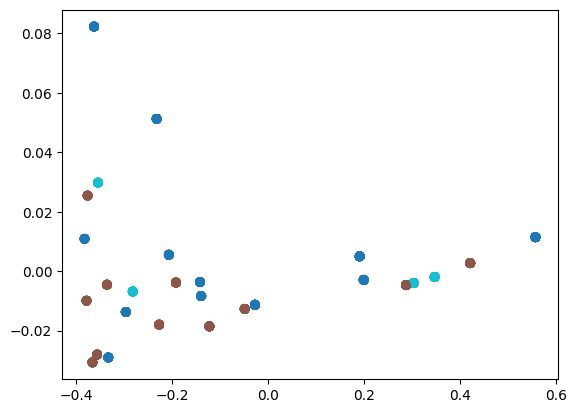

In [33]:
# APPLYING PCA TO WHOLE DATASET

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#COMPUTE PCA
from sklearn.decomposition import PCA
n_components = X.shape[1]
pca = PCA(n_components=n_components)
# pca.fit(X)
X1=pca.fit_transform(X)

#2D PLOT; for Chart Position and Position Duration
plt.scatter(X1[:,0], X1[:,1], c=Y, cmap='tab10')
plt.show()

In [35]:
#COMPUTE PRINCIPAL COMPONENTS use min instead of mle due to it being a small dataset
n_components = min(X.shape[0], X.shape[1])

print(n_components)

5


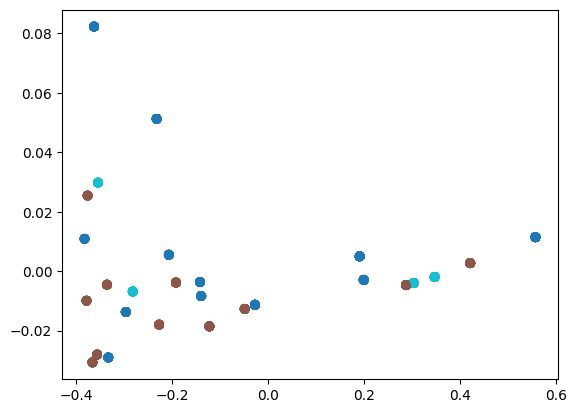

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#COMPUTE PCA
from sklearn.decomposition import PCA
n_components = min(X.shape[0], X.shape[1])
pca = PCA(n_components=n_components)
# pca.fit(X)
X1=pca.fit_transform(X)

#2D PLOT; for Chart Position and Country Rank
plt.scatter(X1[:,0], X1[:,1], c=Y, cmap='tab10')
plt.show()

t-SNE

RESULTS
shape :  (836, 3)
First few points : 
 [[-0.38400403  0.5855886   3.3061678 ]
 [ 6.4336424  -4.7818966   3.0573905 ]]


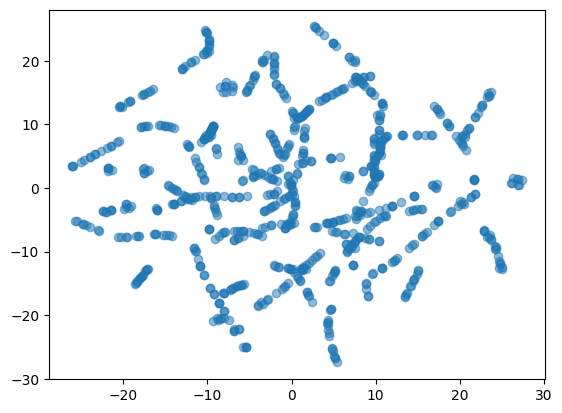

In [36]:
import numpy as np
from sklearn.manifold import TSNE

# DO DIMENSIONALITY REDUCTION
X_embedded = TSNE(n_components=3, learning_rate='auto',init='random', perplexity=5).fit_transform(X)

# EXPLORE RESULTS
print("RESULTS") 
print("shape : ",X_embedded.shape)
print("First few points : \n",X_embedded[0:2,:])

# PLOT 
plt.scatter(X_embedded[:,0],X_embedded[:,1], alpha=0.5)
plt.show()

RESULTS
shape :  (836, 3)
First few points : 
 [[  4.874794    11.300987     0.93595344]
 [ -1.9314505  -12.863016     9.471591  ]]


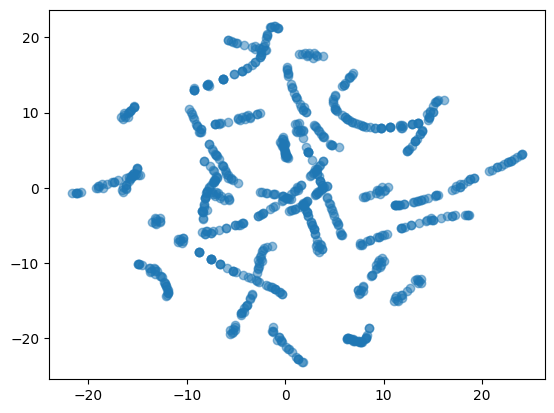

In [37]:
# DIFFERENT PERPLEXITY
X_embedded = TSNE(n_components=3, learning_rate='auto',init='random', perplexity=10).fit_transform(X)

# EXPLORE RESULTS
print("RESULTS") 
print("shape : ",X_embedded.shape)
print("First few points : \n",X_embedded[0:2,:])

# PLOT 
plt.scatter(X_embedded[:,0],X_embedded[:,1], alpha=0.5)
plt.show()

RESULTS
shape :  (836, 3)
First few points : 
 [[-6.304093   8.025846  -5.3861747]
 [18.101643   7.1107926 -8.343393 ]]


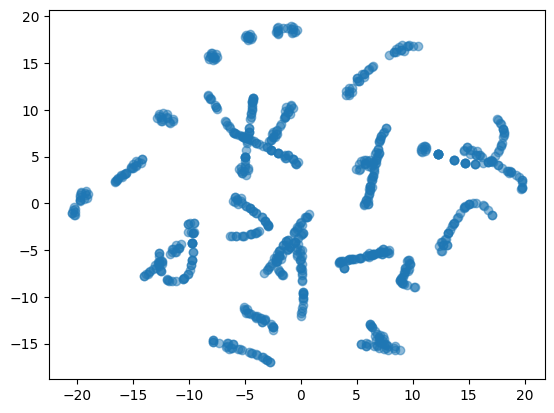

In [38]:
# DIFFERENT PERPLEXITY
X_embedded = TSNE(n_components=3, learning_rate='auto',init='random', perplexity=15).fit_transform(X)

# EXPLORE RESULTS
print("RESULTS") 
print("shape : ",X_embedded.shape)
print("First few points : \n",X_embedded[0:2,:])

# PLOT 
plt.scatter(X_embedded[:,0],X_embedded[:,1], alpha=0.5)
plt.show()

# Clustering Tab

In [ ]:

from sklearn.feature_extraction.text import CountVectorizer

# RUN COUNT VECTORIZER ON OUR CORPUS 
vectorizer = CountVectorizer()

vocabulary = strangerdf["Word"]

Xs  =  vectorizer.fit_transform(vocabulary)   

# VOCABULARY DICTIONARY
vocab = vectorizer.vocabulary_
print(vocab)
dictionary = pd.DataFrame(list(vocabulary.items()), columns=["Word", "Number"])

vocabulary = pd.DataFrame({'Word': vocabulary})

# Concatenate vocabulary with dictionary
wordsdf = pd.concat([vocabulary, dictionary], axis=1)
print(wordsdf)

In [ ]:
# HYPERPARAMETER TUNING


In [39]:
# FINAL ANALYSIS


: 

# Decision Trees